### Урок 11. Jupyter Notebook и несколько слов об аналитике
f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [83]:

my_expression_str = '-12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30'
my_expression_str = '-12x^4 - 18x^3+5x^2 + 10x - 30'
my_expression_str = 'cos(x)'
my_expression_str = my_expression_str.lower()

In [84]:
def check_x(my_expression_str):
    for char in my_expression_str:
        if char == 'x':
            return True

In [85]:
def format_expression(my_expression_str):
    digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    multy = ['*', '/', '(', ')']
    symbols = [char for char in 'xabcdefghijklmnopqrstuvwyz']
    formated_expr = ''
    has_x = False
    for char in my_expression_str:
        if char==' ':
            continue
        elif char in symbols:
            if char == 'x':
                has_x = True
            if (formated_expr != ''):
                if (formated_expr[-1] in digits):
                    formated_expr += '*' + char
                    continue
            formated_expr += char
        elif char=='^':
            formated_expr += '**'
        else:
            formated_expr += char
    return formated_expr

sympy_expression = format_expression(my_expression_str)

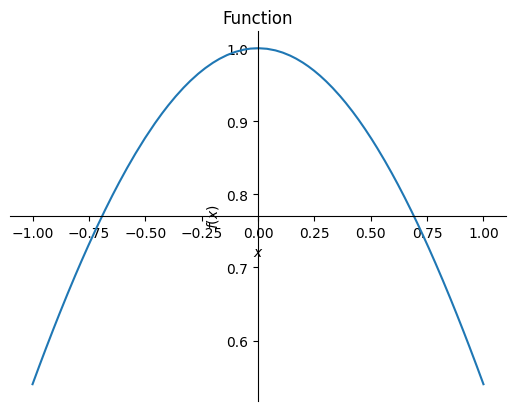

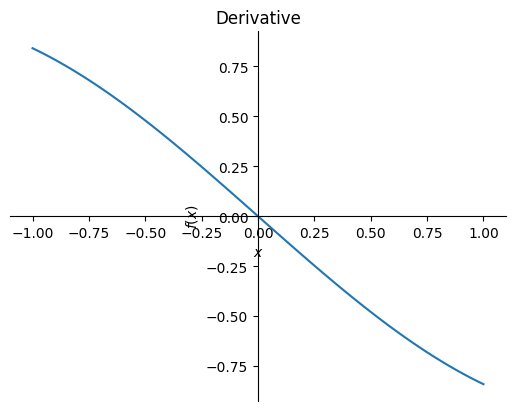

In [87]:
def convert2_expression(expression_str):
    import sympy
    from sympy.plotting import plot
    sympy_expr = sympy.sympify(expression_str)
    x = sympy.Symbol('x')
    return sympy_expr

def draw_expression(sympy_expression, interval = (-10,10)):
    sympy.init_printing()
    left, right = interval
    graph = sympy.plot(sympy_expression, (x, left, right), show = False, title='Function')
    graph.save('fig.png')
    graph = sympy.plot(sympy.diff(sympy_expression, x), (x, left, right), show = False, title='Derivative')
    graph.save('fig_diff.png')
    
def resolve_expression_sympy(sympy_expression, interval = (-10,10)):
    left, right = interval
    decision = sympy.solveset(sympy_expression, x, sympy.Interval(left, right))
    return decision
    
    
# print(resolve_expression_sympy(sympy_expression, (-10,10)))    
draw_expression(format_expression(my_expression_str), (-1,1))
# draw_expression(format_expression('(2 +8)*sin(5*x)+cos(x**2)'), (-1,1))





In [ ]:


def resolve_expression_math(sympy_expression, interval = (-10,10)):
    left, right = interval
    decision = sympy.solveset(sympy_expression, x, sympy.Interval(left, right))
    return decision

In [35]:
s = 'xabcdefghijklmnopqrstuvwyz'
print(s.replace("op", "XX"))

xabcdefghijklmnXXqrstuvwyz


In [82]:
# конвертер строки в выражение math
from math import *
my_expression_str = '(2 +8)*sin(5*x)+cos(x**2)'

def format_expression(my_expression_str):
    """ форматирует строку в нормальный формат пример 2xˆ4 -> 2*x**4 """
    digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    multy = ['*', '/', '(', ')']
    symbols = [char for char in 'xabcdefghijklmnopqrstuvwyz']
    formated_expr = ''
    has_x = False
    for char in my_expression_str:
        if char==' ':
            continue
        elif char in symbols:
            if char == 'x':
                has_x = True
            if (formated_expr != ''):
                if (formated_expr[-1] in digits):
                    formated_expr += '*' + char
                    continue
            formated_expr += char
        elif char=='^':
            formated_expr += '**'
        else:
            formated_expr += char
    return formated_expr

def my_expression_math(my_expression_str, x = 0, accuracy = 3):
    """ возвращает результат функции в точке или решение уравнения с заданной точностью """
    formated_expr = format_expression(my_expression_str)
    x = x
    return round(eval(formated_expr),accuracy)

def check_x(my_expression_str):
    checker_list = ['*x', 'x*','(x','x)',]
    for char in checker_list:
        if my_expression_str.count(char):
            return True

def func_resolver(my_expression_str, interval = (-10,10), accuracy = 3):
    left, right = interval
    if left > right:
        left, right = right, left
    roots = []
    y_is_positive = my_expression_math(my_expression_str, left) > 0
    left_accuracy = left*10**(accuracy)
    right_accuracy = right*10**(accuracy)
    for x_accuracy in range(left_accuracy, right_accuracy, 1):
        x = x_accuracy*10**(-accuracy)
        y = my_expression_math(my_expression_str, x)
        if (y_is_positive) ^ (y > 0):
            roots.append([x, y])
            y_is_positive = y > 0
    return roots
        
def minmax_func_resolver(my_expression_str, interval = (-10,10), accuracy = 3):
    left, right = interval
    if left > right:
        left, right = right, left
    maximums = []
    minimums = []
    x = sympy.Symbol('x')
    sympy_expression = convert2_expression(my_expression_str)
    my_expression_diff_str = str(sympy.diff(sympy_expression, x))
    print(my_expression_diff_str)
    
    y_diff_is_positive = my_expression_math(my_expression_diff_str, x = left) > 0
    # (True, False) - максимальные значения
     # (False, True) - минимальные значения
    left_accuracy = left*10**(accuracy)
    right_accuracy = right*10**(accuracy)
    for x_accuracy in range(left_accuracy, right_accuracy, 1):
        x = x_accuracy*10**(-accuracy)
        y_diff = my_expression_math(my_expression_diff_str, x)
        
        if (y_diff_is_positive, y_diff > 0) == (True, False):
            maximums.append([round(x,accuracy), round(y_diff,accuracy)])
        elif (y_diff_is_positive, y_diff > 0) == (False, True):
            minimums.append([round(x,accuracy), round(y_diff,accuracy)])
        y_diff_is_positive = y_diff > 0    
        
    return {'max': maximums, 'min': minimums}
        
        
def resolver_math(my_expression_str, interval = (-10,10), accuracy = 3):
    is_equation = check_x(my_expression_str)
    if not is_equation:
        return my_expression_math(my_expression_str)
    else:
        funcs = func_resolver(my_expression_str, interval = interval, accuracy = accuracy)
    
        derivatives = minmax_func_resolver(my_expression_str, interval = interval, accuracy = accuracy)
    
        return {'roots': funcs, 'minmax':derivatives}
    
    
print(resolver_math(my_expression_str, interval = (-1,1)))
    

-2*x*sin(x**2) + 50*cos(5*x)
{'roots': [[-0.609, -0.032], [-0.02, 0.002], [0.647, -0.019]], 'minmax': {'max': [[-0.936, -0.181], [0.314, -0.022]], 'min': [[-0.314, 0.102], [0.949, 0.143]]}}


In [ ]:
import math
from scipy.optimize import fsolve

def fx(x):
    return (-12*x**4*math.sin(math.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30)
def fx_diff(x):
    return (12*x**4*math.sin(x)*math.cos(math.cos(x)) - 48*x**3*math.sin(math.cos(x)) - 54*x**2 + 10*x + 10)

y = fsolve(fx, 0.01)

In [12]:
import sympy
from sympy.plotting import plot
sympy.init_printing()
expression = format_expression(my_expression_str)
sympy_expr = sympy.sympify(expression)
x = sympy.Symbol('x')
print(sympy.solve(sympy_expr, (x, -10, 10)))

[(x, (x**2*(-12*x**2*sin(cos(x)) - 18*x + 5) - 30)/x, 10)]


In [32]:
import sympy
from sympy import Interval
from sympy.plotting import plot
sympy.init_printing()
expression = format_expression(my_expression_str)
sympy_expr = sympy.sympify(expression)
x = sympy.Symbol('x')
print(sympy.solve(sympy_expr, x, Interval(-5, 5)))
# solveset(x**2 - 1, x, Interval(0.5, 3))

[(-3/8 - sqrt(121/144 + 4885/(2592*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3)) + 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3))/2 - sqrt(121/72 - 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3) - 19/(96*sqrt(121/144 + 4885/(2592*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3)) + 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3))) - 4885/(2592*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3)))/2, Interval(-5, 5)), (-3/8 + sqrt(121/144 + 4885/(2592*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3)) + 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3))/2 - sqrt(121/72 - 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3) + 19/(96*sqrt(121/144 + 4885/(2592*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3)) + 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3))) - 4885/(2592*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3)))/2, Interval(-5, 5)), (-3/8 + sqrt(121/72 - 2*(208045/373248 + 5*sqrt(9048041)*I/20736)**(1/3) - 19/(96*sqrt(121/144 + 4885/(2592*(208045/373248 + 5*sqrt(904

In [ ]:
import sympy
from sympy import Interval
from sympy.plotting import plot
sympy.init_printing()
expression = format_expression('sin(x)')
sympy_expr = sympy.sympify(expression)
x = sympy.Symbol('x')
print(sympy.solveset(sympy_expr, x, Interval(-10, 10)))
# solveset(x**2 - 1, x, Interval(0.5, 3))

In [95]:
from math import *
def func_value(corrected_expr, x0=0, diff=False):
    """ находит значение уравнения в заданной точке """
    if diff:
        return round(eval(dif_expr), self.accuracy)
    else:
        return round(eval(corrected_expr, {"x": x0}), self.accuracy)

corrected_expr = 'cos(x)'
func_value(corrected_expr)    
    

TypeError: globals must be a dict

In [107]:
from sympy import *
from sympy.abc import x
corrected_expr = 'cos(x)'
# corrected_expr = '-12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30'
f = lambdify(x, corrected_expr)
f(-1)    
    